In [293]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [197]:
class compl:
    def __init__(self, re, im):
        self.re = re
        self.im = im

[[   9.  192.  153.]
 [ 228.  138.   25.]
 [ 181.   99.  203.]
 [  35.    5.  186.]
 [  37.   84.  136.]
 [ 249.  252.  232.]]


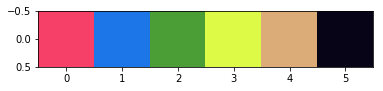

In [267]:
n_colors = 6

colors = (np.random.rand(n_colors, 3) * 255).round()

print(colors)

plt.imshow(np.array([colors]))
plt.show()

In [290]:
W_size = (100, 100)
roots_range = 1
x = np.linspace(-roots_range*2, roots_range*2, W_size[0], 400)
y = np.linspace(-roots_range*2, roots_range*2, W_size[1], 400)
def W(i, j):
    return x[i] + y[j]*1j

In [284]:
n_roots = n_colors - 1

roots = ((np.random.rand(n_roots) * np.random.rand(n_roots) * 1j)- ((1 + 1j) / 2) ) * roots_range * 2
roots

array([-1.-0.06829644j, -1.-0.02849704j, -1.-0.88090129j, -1.-0.11821586j,
       -1.-0.91854043j])

/home/marcin/.anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


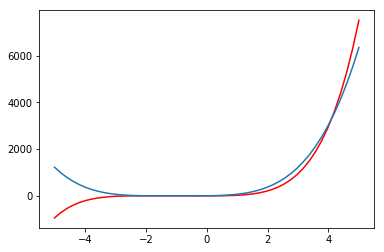

In [285]:
def p(c):
    return (c - roots).prod()

def p_prim(c):
    coeff = (c - roots)
    result = 0
    for i in range(len(roots)):
        elem = 1
        for j in range(len(roots)): 
            if j!=i:
                elem *= coeff[j]
        result += elem
    return result


X = np.linspace(-roots_range*5, roots_range*5)
plt.plot(X, [p(c) for c in X], color='r')
plt.plot(X, [p_prim(c) for c in X])
plt.show()

In [286]:
@np.vectorize
def new_z(z):
    return z - (p(z) / p_prim(z))

In [287]:
e = 0.1

def match_colors(z, epsilon=e):
    diffs = np.abs(z - roots)
    color_no = np.argmin(diffs)
    if (z - roots[color_no]) < epsilon:
        return colors[color_no]
    return colors[n_colors - 1]


In [291]:
iterations = 150

new_W = np.array([[W(i, j) for j in range(W_size[1])] for i in range(W_size[0])])
for i in range(iterations):
    new_W = new_z(new_W)
    

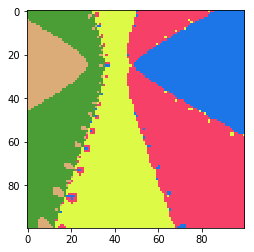

In [294]:
img = np.array([
       [
           match_colors(v) for v in row
       ] 
    for row in new_W
])

plt.imshow(img)
plt.show()